# 배달-날씨 데이터 시각화

## 라이브러리 선언

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc

In [6]:
year_list = ['2019', '2020', '2021']
start_list = ['08-01', '01-01', '01-01']
end_list = ['12-31', '12-31', '07-31']

## 배달 데이터 불러오기

In [7]:
from delivery.delivery_data import get_dataframe as get_delivery

delivery_list = []

for year, start, end in zip(year_list, start_list, end_list):
    delivery_df = get_delivery(year, start, end, 'delivery/original_data/')
    delivery_list.append(delivery_df)

In [4]:
delivery_list[2]

,sum,bossam,bunsik,chicken,cnfood,dessert,dosirak,fastfood,jpfood,krfood,pizza,sashimi,simburum,tang,wsfood
date,,,,,,,,,,,,,,,
01-01,8786,683.0,1102,2218,209.0,884,28.0,720,465,861.0,393.0,227.0,9.0,298.0,54.0
01-02,9694,661.0,1113,2087,217.0,1539,60.0,904,590,794.0,394.0,215.0,19.0,315.0,114.0
01-03,9142,592.0,1025,1777,284.0,1343,18.0,975,524,878.0,455.0,112.0,6.0,329.0,93.0
01-04,6402,348.0,748,1383,117.0,697,165.0,709,499,614.0,184.0,76.0,40.0,204.0,105.0
01-05,6807,469.0,867,1383,155.0,638,164.0,682,521,685.0,258.0,75.0,29.0,216.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07-27,2394,40.0,251,355,20.0,283,0.0,252,849,160.0,8.0,6.0,0.0,93.0,16.0
07-28,2529,36.0,248,404,17.0,271,2.0,323,892,164.0,22.0,4.0,0.0,81.0,19.0
07-29,2488,34.0,243,313,20.0,270,0.0,301,958,162.0,16.0,1.0,0.0,66.0,23.0


## 날씨 데이터 불러오기

In [8]:
from weather.weather_data import get_dataframe as get_weather

weather_list = []

for year, start, end in zip(year_list, start_list, end_list):
    weather_df = get_weather(year, start, end, 'weather/original_data/')
    del weather_df['cloud']
    del weather_df['snow']
    del weather_df['wind']

    weather_list.append(weather_df)

In [11]:
weather_list[0]

,temp,rain
date,,
08-01,26.3,26.9
08-02,28.4,0.0
08-03,29.4,3.0
08-04,28.3,8.6
08-05,30.5,0.0
...,...,...
12-27,-1.7,0.0
12-28,1.1,0.0
12-29,3.8,1.4


## 배달-날씨 단일 그래프
- [x-axis를 공유하지만 y-axis는 공유하지 않는 fig](https://frhyme.github.io/python-lib/plt_twinx/)
- [twinx ()가있는 보조 축 : 범례에 추가하는 방법?](daplus.net/python-twinx-가있는-보조-축-범례에-추가하는-방법/)

In [12]:
from calendar import month_name, monthrange
from datetime import date

In [13]:
start_date, end_date = '08-01', '08-30'

delivery = delivery_list[1].loc[start_date : end_date]
delivery = delivery.reset_index()
delivery = detach_month(delivery)

weather = weather_list[0].loc[start_date : end_date]
weather = weather.reset_index()
weather = detach_month(weather)

year, month = '2019', 8
month_names = list(month_name)[1:]

common_col = 'date'
delivery_col = 'fastfood'
common_label = common_col.capitalize()
delivery_label = delivery_col.capitalize()

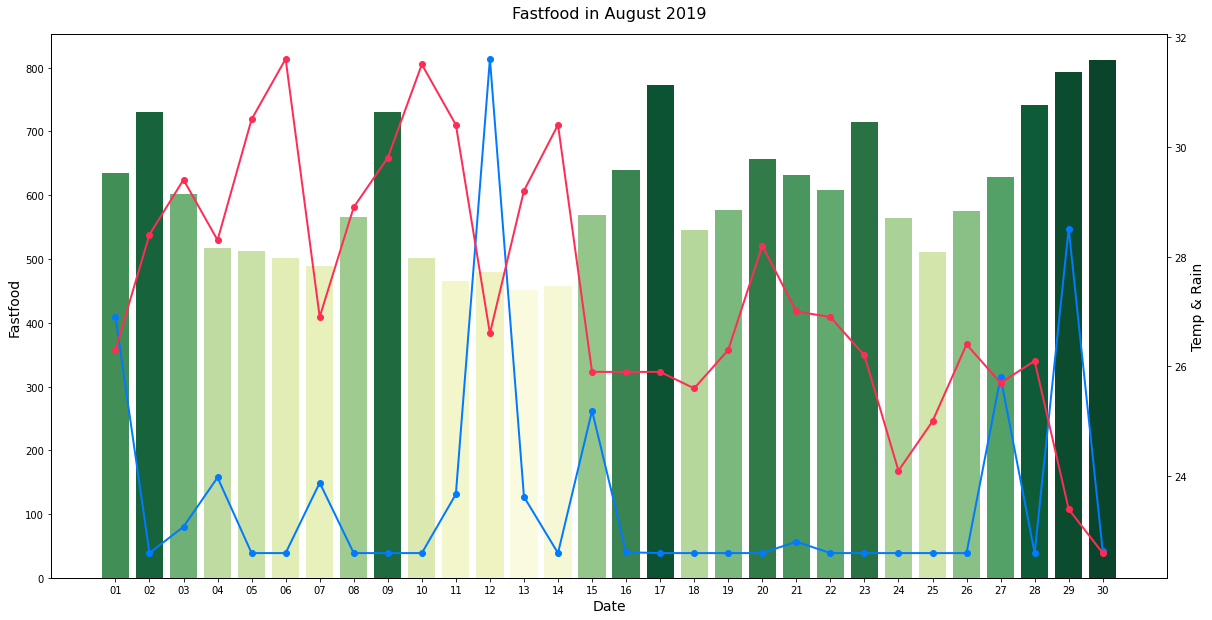

In [14]:
fig, ax1 = plt.subplots(figsize=(20,10))

tit = f'{delivery_label} in {month_names[month-1]} {year}'
plt.title(tit, fontsize=16, pad=16)

sns.barplot(ax=ax1, data=delivery, x=common_col, y=delivery_col, \
            palette="YlGn", hue=delivery_col, dodge=False)
ax1.legend_.remove()
ax1.set_xlabel(common_label, fontsize=14)
ax1.set_ylabel(delivery_label, fontsize=14)

ax2 = ax1.twinx()
# rain_inc = np.diff(weather['rain'])
# rain_inc = np.insert(rain_inc, [0], [0])
# ax2.plot(rain_inc, linestyle='-', marker='o', color='#007aff', linewidth=2)
ax2.plot(weather['rain'], linestyle='-', marker='o', color='#007aff', linewidth=2)
ax2.yaxis.set_ticks([])

ax3 = ax1.twinx()
# temp_inc = np.diff(weather['temp'])
# temp_inc = np.insert(temp_inc, [0], [0])
# ax3.plot(temp_inc, linestyle='-', marker='o', color='#ff2d55', linewidth=2)
ax3.plot(weather['temp'], linestyle='-', marker='o', color='#ff2d55', linewidth=2)
ax3.set_ylabel('Temp & Rain', fontsize=14)

plt.show()

## 월별 배달-날씨 데이터 그래프 수집

In [15]:
from delivery.delivery_data import detach_month

common_col = 'date'
common_label = common_col.capitalize()
common_zip = zip(year_list, start_list, end_list, [0, 1, 2])
month_list = []

for year, start, end, i in common_zip:

    delivery_month = []
    weather_month = []
    month_range = range(int(start[:2]), int(end[:2])+1)
    month_list.append(month_range)

    for month in month_range:
        first_day = date(int(year), month, 1).strftime('%m-%d')
        last_day = date(int(year), month, monthrange(int(year), month)[1]) \
                       .strftime('%m-%d')

        delivery_df = delivery_list[i].loc[first_day : last_day]
        delivery_df = delivery_df.reset_index()
        delivery_df = detach_month(delivery_df)
        delivery_month.append(delivery_df)

        weather_df = weather_list[i].loc[first_day : last_day]
        weather_df = weather_df.reset_index()
        weather_df = detach_month(weather_df)
        weather_month.append(weather_df)
    
    delivery_list[i] = delivery_month
    weather_list[i] = weather_month

In [20]:
sns.set(style="white", color_codes=True)

delivery_cols = delivery_list[0][0].columns.tolist()[1:]
month_names = list(month_name)[1:]
year_zip = zip(delivery_list, weather_list, year_list, month_list)

for delivery_month, weather_month, year, month_range in year_zip:
    break # 실행 시 주석 처리 (주의! 20분 이상 소요)
    month_zip = zip(delivery_month, weather_month, month_range)

    for delivery_df, weather_df, month in month_zip:

        for delivery_col in delivery_cols:

            delivery_label = delivery_col.capitalize()            

            fig, ax1 = plt.subplots(figsize=(20,10))

            tit = f'{delivery_label} in {month_names[month-1]} {year}'
            plt.title(tit, fontsize=16, pad=16)

            try:
                sns.barplot(ax=ax1, data=delivery_df, x=common_col, y=delivery_col, \
                            palette="YlGn", hue=delivery_col, dodge=False)
                ax1.legend_.remove()
                ax1.set_xlabel(common_label, fontsize=14)
                ax1.set_ylabel(delivery_label, fontsize=14)

                ax2 = ax1.twinx()
                ax2.plot(weather_df['rain'], linestyle='-', marker='o', color='#007aff', linewidth=2)
                # ax2.plot(np.diff(weather_df['rain']), linestyle='-', marker='o', color='#007aff', linewidth=2)
                ax2.yaxis.set_ticks([])

                ax3 = ax1.twinx()
                ax3.plot(weather_df['temp'], linestyle='-', marker='o', color='#ff2d55', linewidth=2)
                ax3.set_ylabel('Temp & Rain', fontsize=14)
            except ValueError:
                continue
            
            filename = f'{year}{str(month).zfill(2)}_{delivery_label}'
            plt.savefig(f'graphs/{filename}.png', dpi=300)